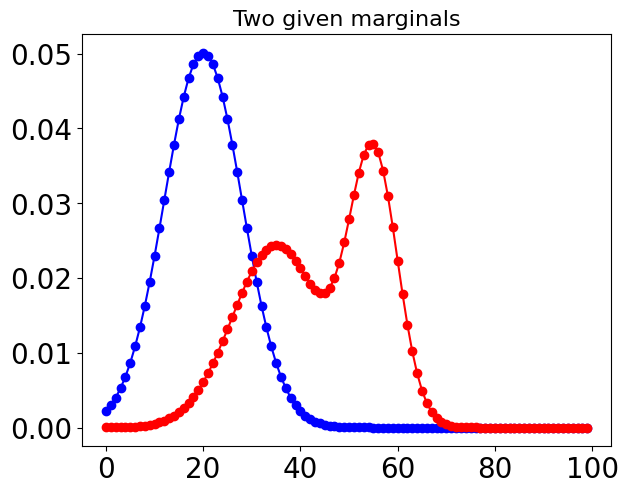

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot

import matplotlib
matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick',labelsize = 20)

np.random.seed(123456)

## numerical expertiments
colors=['k','b','g','r']

n = 100
x = np.arange(n,dtype = np.float64)

p1 = ot.datasets.get_1D_gauss(n,20,8)#0.55 * ot.datasets.get_1D_gauss(n,20,8) + 0.45 * ot.datasets.get_1D_gauss(n,70,9)
p2 = 0.55 * ot.datasets.get_1D_gauss(n,35,9) + 0.45 * ot.datasets.get_1D_gauss(n,55,5)

plt.plot(x,p1,'o-',color='blue')
plt.plot(x,p2,'o-',color='red')
plt.tight_layout()
plt.title('Two given marginals', fontsize=16)
plt.show()

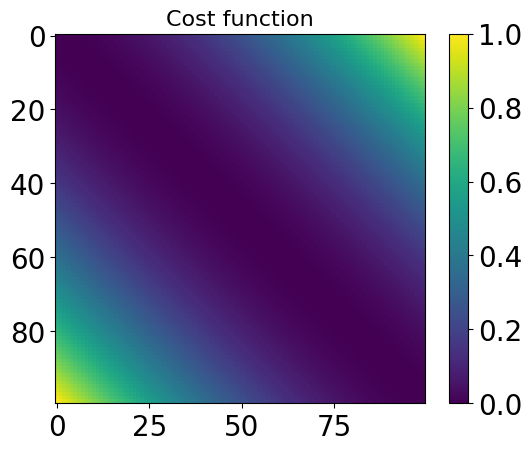

In [4]:
## c = |x-y|.^p
# c = np.absolute(x-np.expand_dims(x,axis=1))
# c = np.power(c,2)
#
# ## c = xy
# c = x*np.expand_dims(x,axis=1)
#
# # c = 1 - max(x,y)
# c = 1-np.maximum(x,np.expand_dims(x,axis=1))
#
# # diag = 0
# c = c - np.diag(np.diag(c))

#
c = np.absolute(x - np.expand_dims(x, axis=1))
c = np.power(c, 2)
c/=c.max()
# u, s, vh = np.linalg.svd(c, full_matrices=False)
# c = np.dot(u[:, :3] * s[:3], vh[:3,:])

# print(c)
plt.imshow(c)
plt.colorbar()
# plt.clim(0, 1)
plt.title('Cost function', fontsize=16)
plt.show()

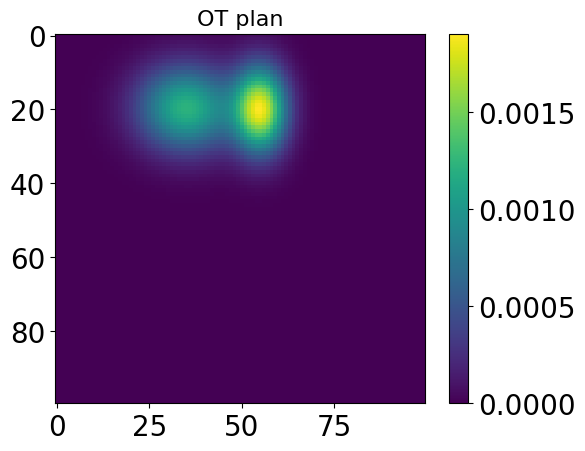

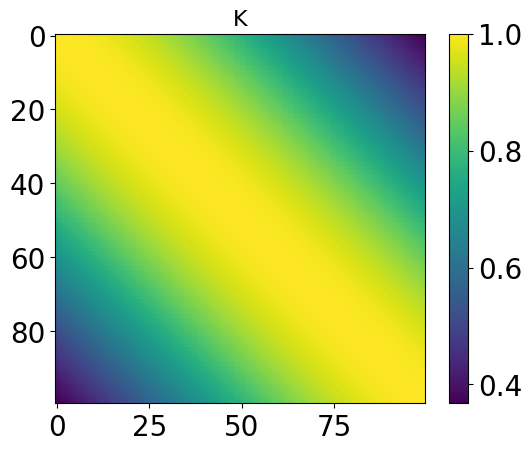

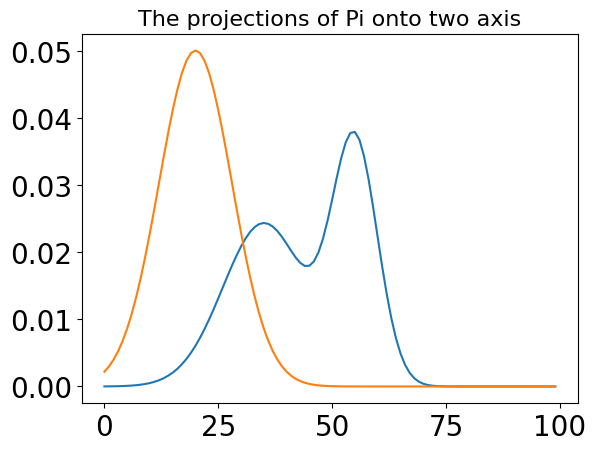

In [19]:
gamma = 1
K = np.exp(-c/gamma)
u = np.ones([n,])
v = u
maxiter = 1000
for iter in range(maxiter):
    u = p1/np.matmul(K,v)
    v = p2/np.matmul(np.transpose(K),u)
pi = np.expand_dims(u,axis=1)*K*np.expand_dims(v,axis = 0) # + np.finfo(float).eps
plt.imshow(pi) # plot transport plan
# plt.title('pi hat', fontsize=25)
plt.colorbar()
plt.title('OT plan', fontsize=16)
plt.show()

####
# u=np.reshape(u,(100,1))
# v=np.reshape(v,(100,1))
# K = pi / np.dot(u, v.T)
# # print(iter)
# inv_c = -gamma * np.log(K)
plt.imshow(K)  # plot transport plan
plt.title('K', fontsize=16)
plt.colorbar()
plt.show()
####


#
plt.plot(np.sum(pi,axis = 0))
plt.plot(np.sum(pi,axis = 1))
plt.title('The projections of Pi onto two axis', fontsize=16)
plt.show()